In [2]:
!unzip /content/FaceRecognitionRevised.zip

Archive:  /content/FaceRecognitionRevised.zip
   creating: FaceRecognitionRevised/Addison/
  inflating: FaceRecognitionRevised/Addison/Addison1.PNG  
  inflating: FaceRecognitionRevised/Addison/Addison10.PNG  
  inflating: FaceRecognitionRevised/Addison/Addison11.PNG  
  inflating: FaceRecognitionRevised/Addison/Addison12.PNG  
  inflating: FaceRecognitionRevised/Addison/Addison13.PNG  
  inflating: FaceRecognitionRevised/Addison/Addison14.PNG  
  inflating: FaceRecognitionRevised/Addison/Addison15.PNG  
  inflating: FaceRecognitionRevised/Addison/Addison16.PNG  
  inflating: FaceRecognitionRevised/Addison/Addison17.PNG  
  inflating: FaceRecognitionRevised/Addison/Addison18.PNG  
  inflating: FaceRecognitionRevised/Addison/Addison19.PNG  
  inflating: FaceRecognitionRevised/Addison/Addison2.PNG  
  inflating: FaceRecognitionRevised/Addison/Addison20.PNG  
  inflating: FaceRecognitionRevised/Addison/Addison21.PNG  
  inflating: FaceRecognitionRevised/Addison/Addison22.PNG  
  inflating

In [3]:
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 720 kB 5.2 MB/s 
     |████████████████████████████████| 1.2 MB 40.3 MB/s 
     |████████████████████████████████| 197 kB 43.7 MB/s 
     |████████████████████████████████| 60 kB 6.2 MB/s 
Mounted at /content/gdrive


In [4]:
from fastbook import *
from fastai.vision.widgets import *
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [5]:
path = Path('/content/FaceRecognitionRevised')
path

Path('/content/FaceRecognitionRevised')

In [6]:
faces = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [7]:
faces = faces.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = faces.dataloaders(path)

In [47]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(18)

epoch,train_loss,valid_loss,error_rate,time
0,3.067651,3.000686,0.818182,00:04


epoch,train_loss,valid_loss,error_rate,time
0,2.330786,2.037162,0.745455,00:05
1,2.242705,1.506885,0.472727,00:04
2,2.030533,1.167950,0.327273,00:05
3,1.825128,0.943722,0.309091,00:05
4,1.599771,0.772421,0.290909,00:04
5,1.403691,0.619544,0.236364,00:04
6,1.238252,0.490934,0.200000,00:04
7,1.100103,0.424591,0.163636,00:05
8,0.980377,0.378673,0.127273,00:04
9,0.878217,0.334266,0.127273,00:04


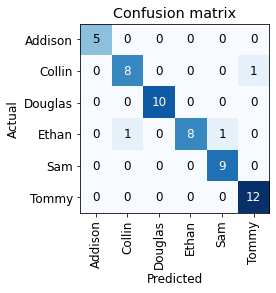

In [29]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [48]:
learn.export()

In [49]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [50]:
learn_inf = load_learner('/content/export.pkl')

In [64]:
learn_inf.predict('/content/TommyTest1.PNG')

('Tommy',
 TensorBase(5),
 TensorBase([5.2421e-04, 5.3426e-02, 1.1707e-02, 3.8351e-01, 6.3896e-03, 5.4444e-01]))

In [59]:
!pip install voila
!jupyter serverextension enable --sys-prefix voila

     |████████████████████████████████| 1.7 MB 5.3 MB/s 
     |████████████████████████████████| 112 kB 51.6 MB/s 
     |████████████████████████████████| 561 kB 50.6 MB/s 
     |████████████████████████████████| 70 kB 8.1 MB/s 
     |████████████████████████████████| 53 kB 1.8 MB/s 
     |████████████████████████████████| 130 kB 51.5 MB/s 
     |████████████████████████████████| 342 kB 57.2 MB/s 
     |████████████████████████████████| 428 kB 52.8 MB/s 
     |████████████████████████████████| 54 kB 2.6 MB/s 
     |████████████████████████████████| 79 kB 7.1 MB/s 
     |████████████████████████████████| 133 kB 52.4 MB/s 
  Attempting uninstall: tornado
    Found existing installation: tornado 5.1.1
    Uninstalling tornado-5.1.1:
      Successfully uninstalled tornado-5.1.1
  Attempting uninstall: jupyter-client
    Found existing installation: jupyter-client 5.3.5
    Uninstalling jupyter-client-5.3.5:
      Successfully uninstalled jupyter-client-5.3.5
  Attempting uninstall: nbclien

Enabling: voila
- Writing config: /usr/etc/jupyter
    - Validating...
      voila  OK


In [82]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [83]:
img = PILImage.create(btn_upload.data[-1])

In [84]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [85]:
pred,pred_idx,probs = learn_inf.predict(img)

In [86]:
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: Collin; Probability: 0.9801')

In [87]:
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [88]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [89]:
#Putting back btn_upload to a widget for next cell
btn_upload = widgets.FileUpload()

In [90]:
#hide_output
VBox([widgets.Label('Select your bear!'), 
      btn_upload, btn_run, out_pl, lbl_pred])